In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn')

In [4]:
df=pd.read_csv('Datasets/MNIST-1/train.csv')
X=df.values
Y=X[:,-1]
X=X[:,:-1]
print(X.shape,Y.shape)

(19999, 784) (19999,)


In [12]:
def dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
def KNN(X,Y,query,k=20):
    distance=[]
    size=X.shape[0]
    for i in range(size):
        d=dist(X[i],query)
        distance.append([d,Y[i]])
    distance.sort()
    distance=distance[:k]
    distance=np.array(distance)
    distance=np.unique(distance[:,1],return_counts=True)
#     print(distance)
    return distance[0][distance[1].argmax()]

(9999, 784) (9999,)
Given- 2 Prediction- 2
Given- 1 Prediction- 1
Given- 0 Prediction- 0
Given- 4 Prediction- 4


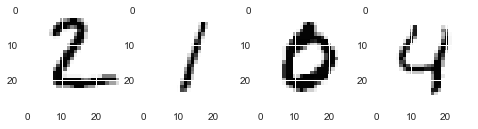

In [13]:
df_test=pd.read_csv('Datasets/MNIST-1/test.csv')
X_test=df_test.values
df_test.head()
Y_test=X_test[:,-1]
X_test=X_test[:,:-1]
print(X_test.shape,Y_test.shape)
for i in range(4):
    features=X_test[i].reshape((28,28))
    plt.subplot(1,4,i+1)
    plt.imshow(features)
    print("Given-",Y_test[i],"Prediction-",int(KNN(X,Y,X_test[i],10)))
plt.show()

In [14]:
correct=0
for i in range(Y_test.shape[0]//100):
    Y_pred=int(KNN(X,Y,X_test[i],5))
    if Y_pred==Y_test[i]:
        correct+=1
print("ACCURACY :",(correct)/(X_test.shape[0]//100))

ACCURACY : 0.98989898989899
